In [2]:
from KRZmetric import *
import numpy as np
import matplotlib.pyplot as plt
import time
#计算轨道的代码里，文件命名没有区分mass ratio，短的计算还行可以现算，长的就。。。等要算长的再改吧
mydir='D:\\HighEnergyAstro\\SHAO, Wenbiao H\\radiativeDephasing\\'

首先取定一个reasonable 的E,L,Q，这里通过获得某个轨道的ELQ

In [3]:
E,Lz,Q=getELQ(0.5,6,np.pi/4,0.5)
E,Lz,Q


(0.946987591328603, 2.2934844203095666, 5.2729725989364153)

由这个ELQ算一个KRZ的轨道，文件名（这里把Q改成了另一个数，忘了为什么。。）

In [5]:

M=1e6;spin=0.5;d2=0;d3=0
d1=0.2
Q=5.155543
[p,ecc,iota]=(6.8191897315625827, 0.43173473149300562, 0.77975669538489656)

In [10]:
#KRZ
print('M=%f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;'%(M,d1,spin,p,ecc,iota,E,Lz,Q))

M=1000000.000000; krz_d[1]= 0.200000; spin = 0.500000;current_p = 6.819190;current_e = 0.431735;current_iota = 0.779757;
E=0.9469875913;Lz=2.2934844203; Q=5.1555430000;


In [11]:
orbfilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,E,Lz,Q,d1,d2,d3)
wavefilename1='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,E,Lz,Q,d1,d2,d3)

In [32]:
#reading
t_sec,wave_p,wave_c=np.loadtxt(wavefilename1,unpack=True)
index, myt_sec, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename1,unpack=True)

In [33]:
if wave_p[0]==0:
    [t_sec,wave]=getwave(orbfilename1,M=M)
    wave_p=np.real(wave)

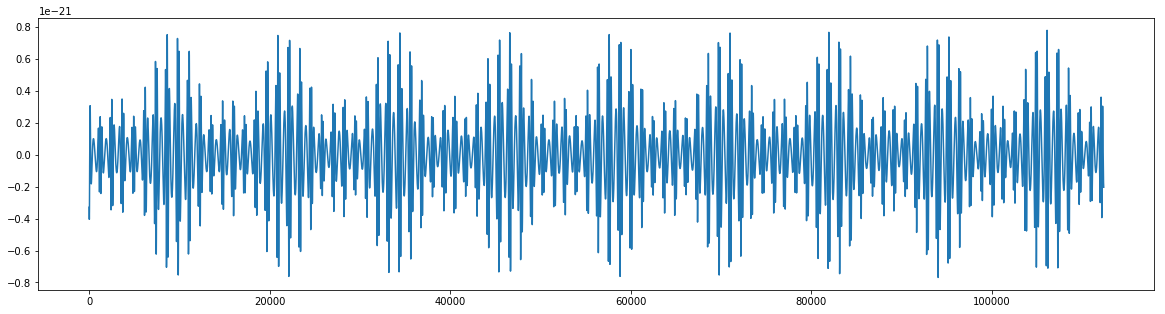

In [34]:
#plotting KRZ wave
fig=plt.figure()
plt.plot(t_sec,wave_p)
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
#plt.xlim(0,2e3)

In [35]:
## getting Kerr wave

# Corresponding confusion M and a

M_kerr=937173.17604899604
a_kerr=0.55307629912254186
p_kerr=7.1717260434110983

[Ekerr,Lzkerr,Q_kerr]=getELQ(ecc,p_kerr,iota,a_kerr)
d1=0;d2=0;d3=0;
print('M= %f; krz_d[1]= %f; spin = %f;current_p = %f;current_e = %f;current_iota = %f;\nE=%.10f;Lz=%.10f; Q=%.10f;'%(M_kerr,0,a_kerr,p_kerr,ecc,iota,Ekerr,Lzkerr,Q_kerr))

M= 937173.176049; krz_d[1]= 0.000000; spin = 0.553076;current_p = 7.171726;current_e = 0.431735;current_iota = 0.779757;
E=0.9496658252;Lz=2.3523843185; Q=5.4250748009;


In [36]:
orbfilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'\
    %(M_kerr,a_kerr,Ekerr,Lzkerr,Q_kerr,d1,d2,d3)
wavefilename2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\flux\\flux\\wave_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'\
    %(M_kerr,a_kerr,Ekerr,Lzkerr,Q_kerr,d1,d2,d3)

In [37]:
#reading Kerr
t_sec2,wave_p2,wave_c2=np.loadtxt(wavefilename2,unpack=True)
index, myt_sec, tau,t2,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(orbfilename2,unpack=True)

In [38]:
if wave_p2[0]==0:
    [t_sec2,wave2]=getwave(orbfilename2,M=M_kerr)
    wave_p2=np.real(wave2)

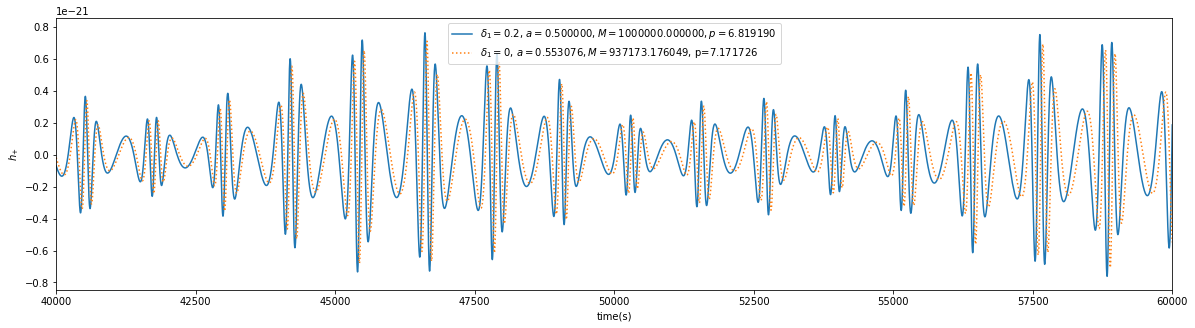

In [39]:
#comparing wave
fig=plt.figure()
plt.plot(t_sec,wave_p,label='$\delta_1=0.2,\, a=%f, M=%f, p=%f$'%(spin,M,p))
plt.plot(t_sec2,wave_p2,':',label='$\delta_1=0,\, a=%f, M=%f$, p=%f'%(a_kerr,M_kerr,p_kerr))
fig.set_size_inches(20, 5)
#plt.ylim(-1e-22,1e-22)
plt.xlim(4e4,6e4)
plt.xlabel('time(s)')
plt.ylabel('$h_\plus$')
plt.legend()
plt.savefig(mydir+'Evo_3D_ma_%d.pdf'%time.time())

In [40]:
tottimelist=np.arange(5000,60000,5000)
olplist=[]
for tottime in tottimelist:
    olplist.append(overlap([t_sec[np.where(t_sec<tottime)],wave_p[np.where(t_sec<tottime)]+1j*wave_c[np.where(t_sec<tottime)]],
        [t_sec2[np.where(t_sec<tottime)],wave_p2[np.where(t_sec<tottime)]+1j*wave_c2[np.where(t_sec<tottime)]]))

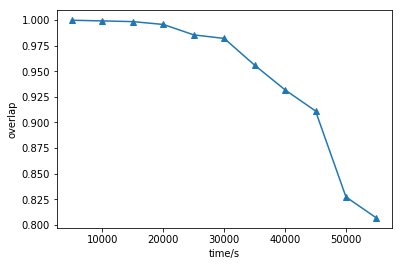

In [44]:
plt.plot(tottimelist,olplist,marker='^')
plt.xlabel('time/s')
plt.ylabel('overlap')
plt.savefig(mydir+'olp_3D_%d.pdf'%time.time())